<a href="https://www.kaggle.com/code/muzamil00231/used-cars-price-prediction?scriptVersionId=106034026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars/used_cars.csv


In [2]:

import numpy as np # linear algebra on multidimensional array
import pandas as pd # data processing and manipulation, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Data visualisation
import matplotlib.pyplot as plt # Data visualisation



In [3]:
# Read the CSV file 

cars_data = pd.read_csv('../input/used-cars/used_cars.csv')


## 1) Exploratory Data Analysis
    

    1.info
    2.shape of dataframe
    3.dimension of data
    4.Finding the duplicate data
    5.Finding the missing or null values
        A.df.notna().sum()
        B.df.isnull().sum()
        C.finding elements in selected feature
        D.finding nan in particular column
        E.searching any word in all data frame : 
    6.Converting Object to Integer or float
    7.Detecting Outliers
    8.Removing Outliers
    9.Categorical Variables
        1.Creating dummy Variable
    

# 1) Identifying the type of data using info()



To identify the data types, I use the info method. The info method prints a summary of the data in the data frame along with its data types. Here, there are 428 entries (0-427 rows). The data frame after removing irrelevant columns comprises 10 columns. Here the Make, MSRP are of an object type whereas Engine size and Cylinders are of float type and Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase and Length are of integer type. Hence there are 2 object types, 2 float types and 6 integer types of data present in the data frame.

In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [5]:
cars_data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

# 2)Finding the dimensions of the data frame

To get the number of rows and columns of the data frame, I used the shape method. The shape method gets the number of rows and the number of columns of the data frame. Here, there are 428 rows and 15 columns. Hence the shape method returns (428, 15). And to find the dimensions of the data frame I used ndim (dimension) method. This method prints the dimensions of the data frame. Here, the whole data frame is of 2 dimensional (rows and columns).





In [6]:
cars_data.shape

(428, 15)

# 3.dimension of data

In [7]:
# Getting the dimensions of the data frame
cars_data.ndim

2

# 4)Finding the duplicate data

This is a handy thing to perform on a data set because often there might be duplicate or redundant data in the data sets, to remove this I used the MSRP as a reference such that there cannot be more than two same MSRP prices of the car, it shows that few data are redundant because prices of the cars can never match very accurately. So before removing the duplicates, there were 426 rows and after removing there are 409 meaning that there were 17 duplicate data.

In [8]:
cars_data = cars_data.drop_duplicates(subset='MSRP', keep='first')
cars_data.count()

Make           410
Model          410
Type           410
Origin         410
DriveTrain     410
MSRP           410
Invoice        410
EngineSize     410
Cylinders      408
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         410
Wheelbase      410
Length         410
dtype: int64

# 5.Finding the missing or null values

**Finding the missing or null values.**

Many times there might be a lot of missing values in the dataset. There are several approaches to deal with this scenario either we can drop those values or fill those values with the mean of that column. Here, 2 entries were having N/A in the Cylinders feature. This can be found by using the is_null( ) method which returns the null or missing values in the data frame. So rather than deleting those two entries, I filled those values with the mean of the cylinders columns and their value came as 6.0 each. I was able to find this while I was peeking at the first and last few rows of the data set. I think rather than deleting this is a good approach because every entry of data is vital. 

**Encode missing numerical values**


Missing values are encoded in different ways. They can appear as `NaN`, `NA`, `?`, `zeros`, `xx`, `-1` or a blank space `“ ”`. 
We can use various pandas methods to deal with missing values. 

But, pandas always recognize missing values as `NaN`.  So, it is essential that we should first convert all the `?`, `zeros`, `xx`, `-1` or `“ ”` to `NaN`. If the missing values isn’t identified as `NaN`, then we have to first convert or replace 
such `non NaN` entry with a `NaN`.
    
    1.df.notna().sum()
    2.df.isnull().sum()
    3.finding elements in selected feature
    4.finding nan in particular column
    5.searching any word in all data frame : 
        if 'Acura' in df.values:
    






### A.Sum all the elments in all columns have no null

In [9]:
#How many data have no null
cars_data.notna().sum()


Make           410
Model          410
Type           410
Origin         410
DriveTrain     410
MSRP           410
Invoice        410
EngineSize     410
Cylinders      408
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         410
Wheelbase      410
Length         410
dtype: int64

### B.Sum all the elments in all columns having null

In [10]:
# Now lets check for missing data, if any
cars_data.isnull().sum()

# we see that column 'cylinders' has 2 null values

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [11]:
cars_data = cars_data.dropna()

### C.finding elements in selected feature

In [12]:
#"Finding any integer or string in all dataset"
#finding nan in particular column
# df[df['Cylinders'].isnull()].reset_index()
cars_data['MSRP'].loc[cars_data['MSRP'].values=='-1'].reset_index()


,index,MSRP


### 4.finding nan in particular column

In [13]:
cars_data[cars_data['Cylinders'].isnull()]['Cylinders'].reset_index()


,index,Cylinders


### D.searching any word in all data frame 

In [14]:
if '-1' in cars_data.values:
    print("Yes")
else:
    print("Sorry")

Sorry


# 6.Converting Object to Integer or float

### 1.MSRP

In [15]:
cars_data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [16]:
cars_data['MSRP'].reset_index()

,index,MSRP
0,0,"$36,945"
1,1,"$23,820"
2,2,"$26,990"
3,3,"$33,195"
4,4,"$43,755"
...,...,...
403,423,"$40,565"
404,424,"$42,565"
405,425,"$45,210"
406,426,"$26,135"


In [17]:
# column 'MSRP' and 'Invoice' are not interger type and has $ and (,) in them, we make these columns interger type
cars_data['MSRP'] = cars_data['MSRP'].str.replace('$','',regex = 'False')
cars_data['MSRP'] = cars_data['MSRP'].str.replace(',','',regex = 'False')
cars_data['MSRP'] = cars_data['MSRP'].astype(int)

In [18]:
cars_data['MSRP'].reset_index()

,index,MSRP
0,0,36945
1,1,23820
2,2,26990
3,3,33195
4,4,43755
...,...,...
403,423,40565
404,424,42565
405,425,45210
406,426,26135


### Invoice

In [19]:
cars_data['Invoice'] = cars_data['Invoice'].str.replace('$', '', regex = False)
cars_data['Invoice'] = cars_data['Invoice'].str.replace(',', '', regex = False)
cars_data['Invoice'] = cars_data['Invoice'].astype(int)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         408 non-null    object 
 1   Model        408 non-null    object 
 2   Type         408 non-null    object 
 3   Origin       408 non-null    object 
 4   DriveTrain   408 non-null    object 
 5   MSRP         408 non-null    int64  
 6   Invoice      408 non-null    int64  
 7   EngineSize   408 non-null    float64
 8   Cylinders    408 non-null    float64
 9   Horsepower   408 non-null    int64  
 10  MPG_City     408 non-null    int64  
 11  MPG_Highway  408 non-null    int64  
 12  Weight       408 non-null    int64  
 13  Wheelbase    408 non-null    int64  
 14  Length       408 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 51.0+ KB


# 7.Detecting Outliers

#### 1.Describe

In [20]:
cars_data.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,408.000000,408.000000,408.000000,408.000000,408.00000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,32950.732843,30177.512255,3.210294,5.823529,216.00000,20.049020,26.803922,3583.870098,108.178922,186.428922
std,19671.086352,17858.614982,1.109991,1.560645,72.49387,5.291739,5.801871,767.338449,8.384779,14.425607
min,10280.000000,9875.000000,1.400000,3.000000,73.00000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20317.500000,18794.000000,2.400000,4.000000,165.00000,17.000000,24.000000,3108.000000,103.000000,178.000000
50%,27917.500000,25679.000000,3.000000,6.000000,210.00000,19.000000,26.000000,3476.500000,107.000000,187.000000
75%,39508.750000,36079.500000,3.900000,6.000000,251.25000,21.250000,29.000000,3978.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.00000,60.000000,66.000000,7190.000000,144.000000,238.000000


#### 2.Scatter plot

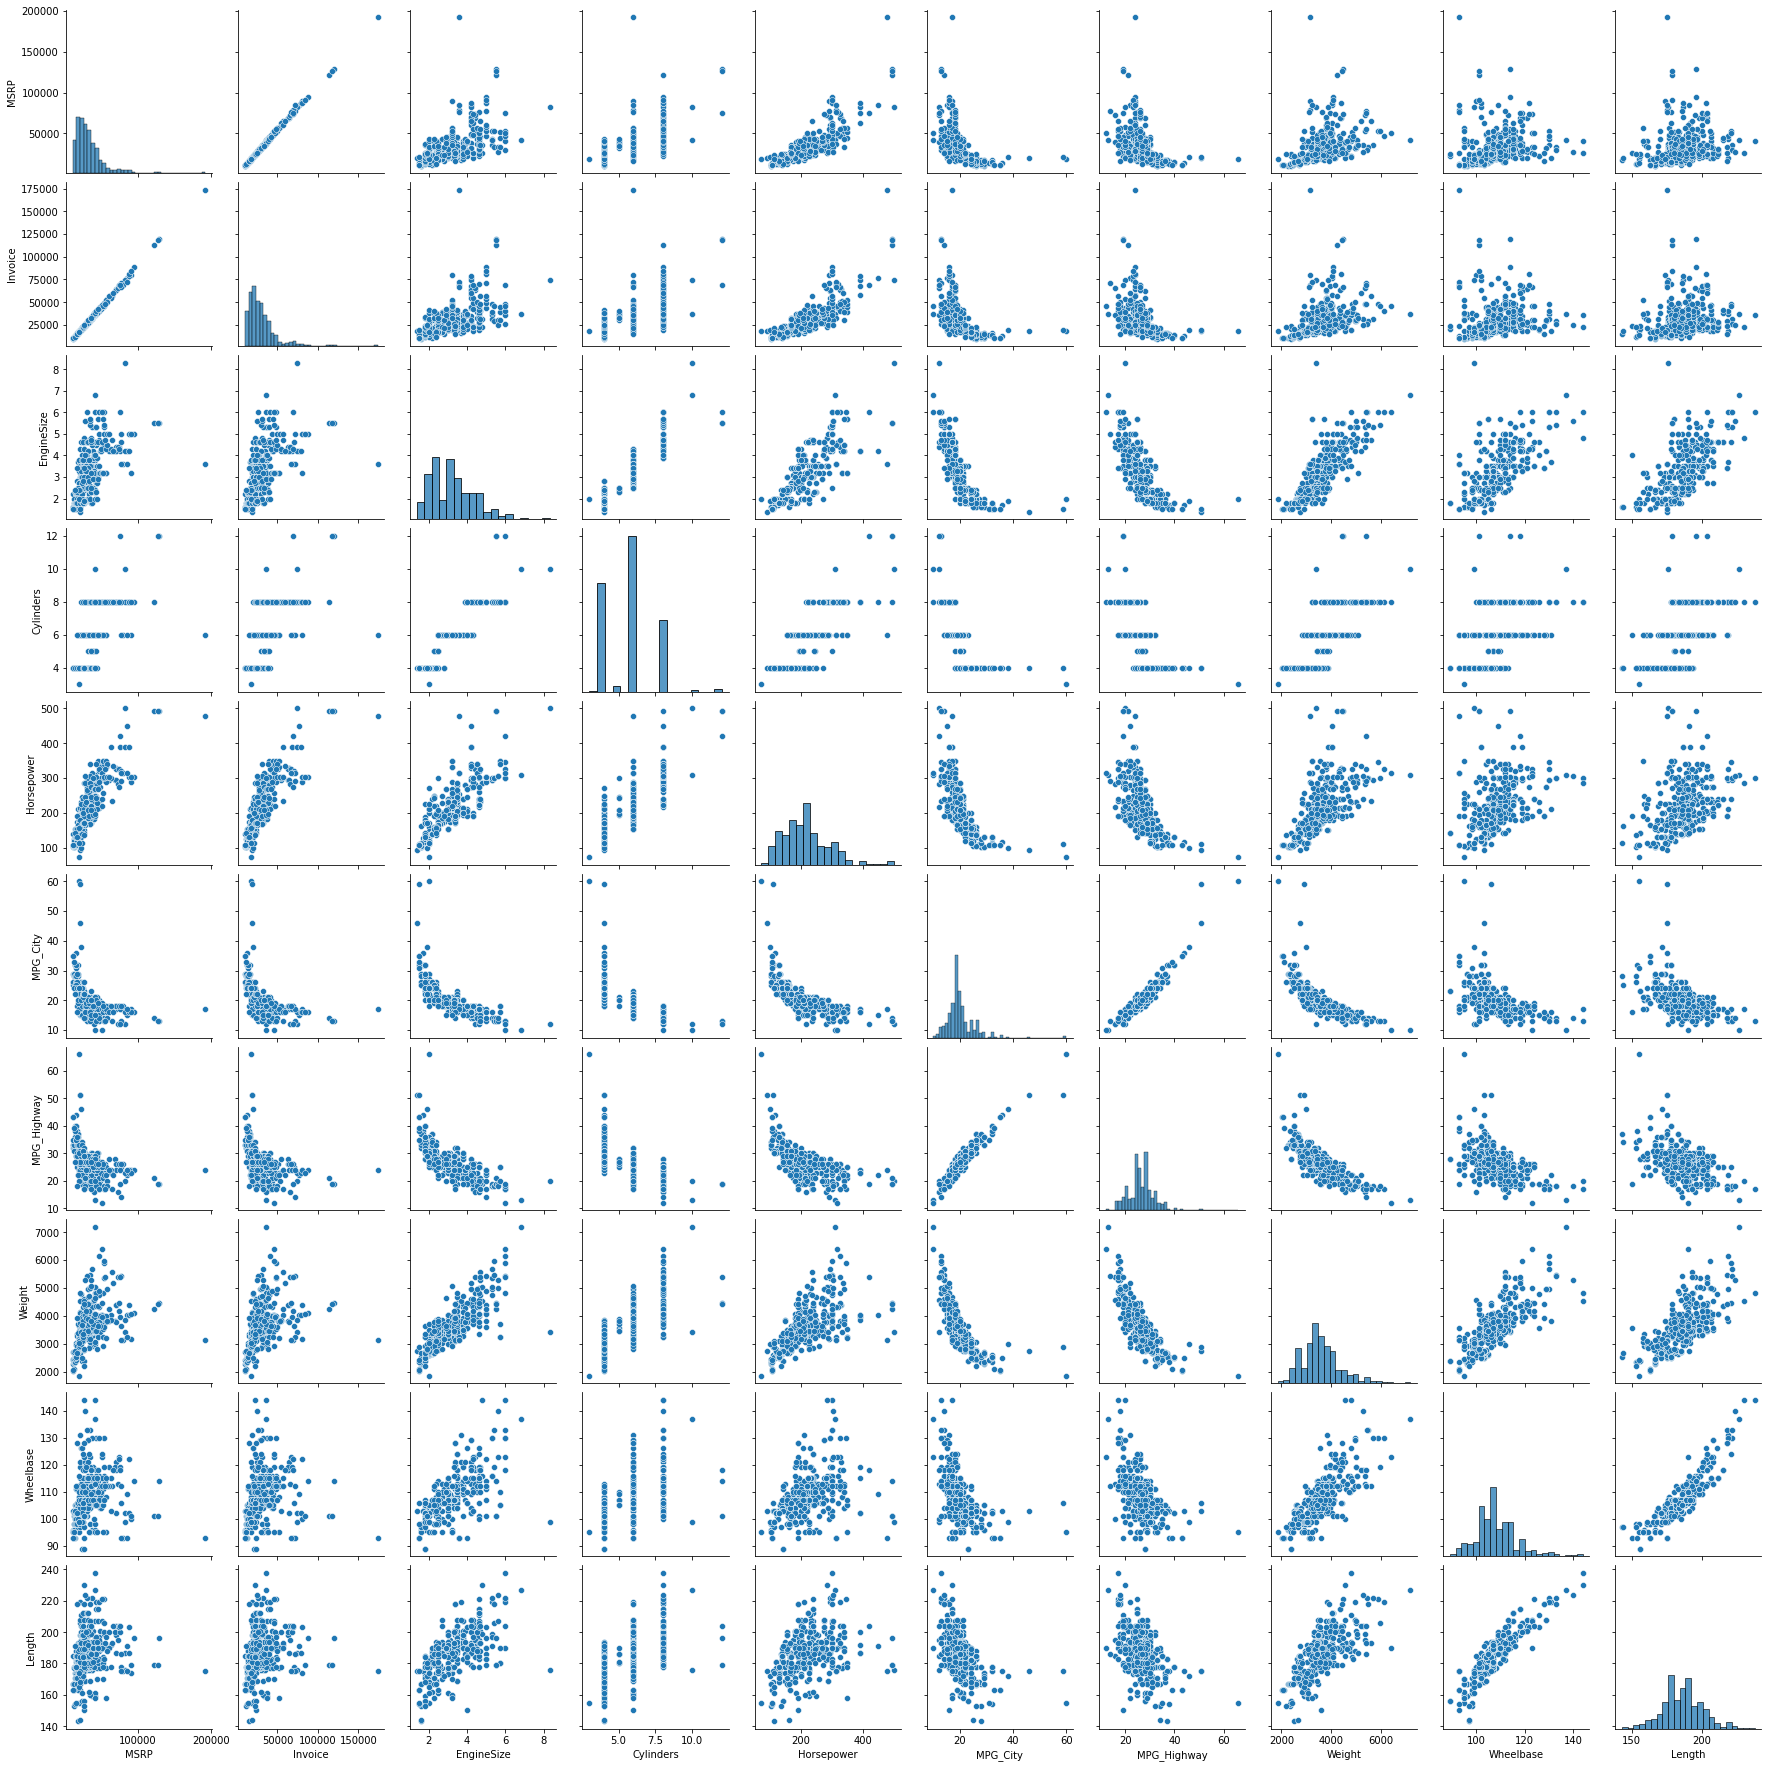

In [21]:
sns.pairplot( data = cars_data)

#### 3.heatMap

<AxesSubplot:>

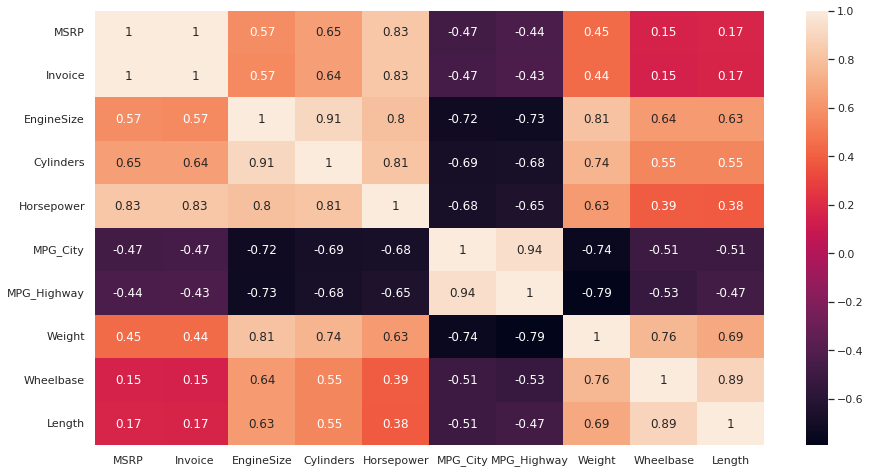

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cars_data.corr(), annot = True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<Figure size 1080x576 with 0 Axes>

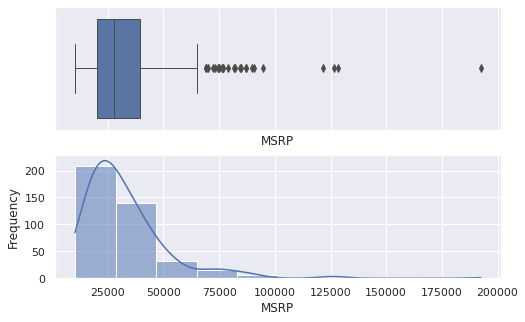

<Figure size 576x360 with 0 Axes>

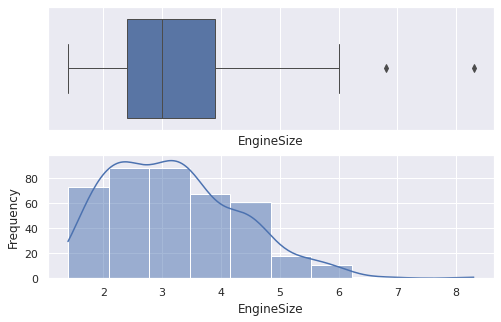

<Figure size 576x360 with 0 Axes>

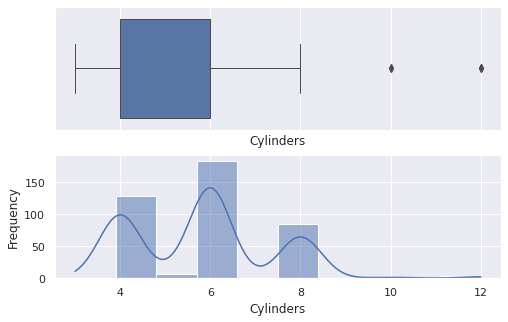

<Figure size 576x360 with 0 Axes>

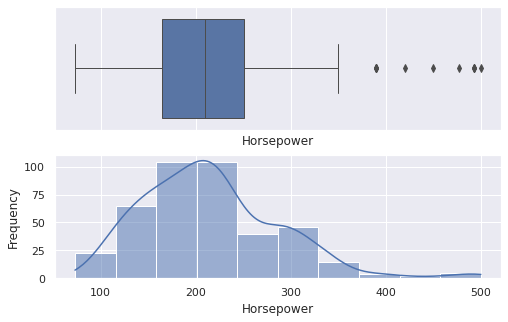

<Figure size 576x360 with 0 Axes>

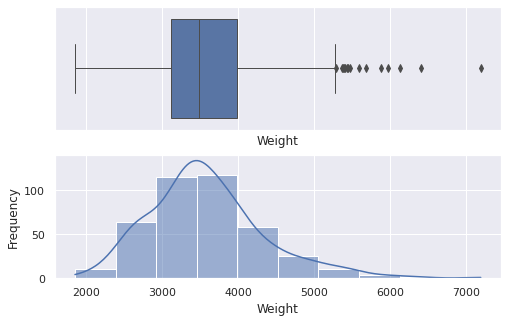

<Figure size 576x360 with 0 Axes>

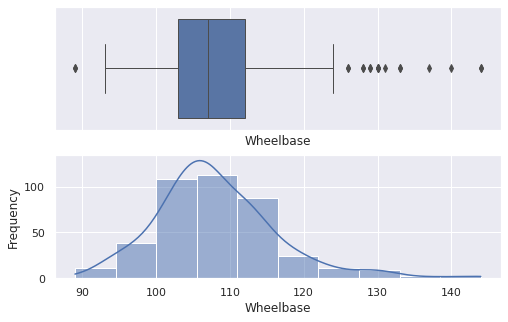

<Figure size 576x360 with 0 Axes>

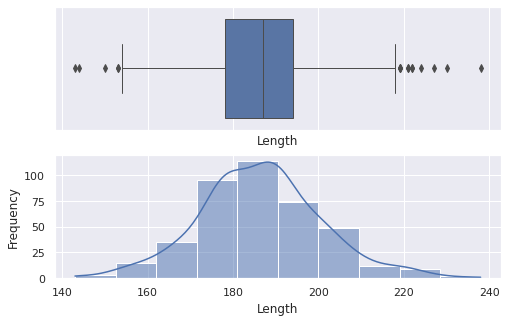

In [23]:
# ['MSRP','Invoice','EngineSize','Cylinders','Horsepower','Weight','Wheelbase','Length']:
# a for loop to automate our task--------------
for i in ['MSRP','EngineSize','Cylinders','Horsepower','Weight','Wheelbase','Length']:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(cars_data[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(cars_data[i], ax=ax_hist , bins = 10,kde=True)

***Summary***
As we know this kind of plot usally used for finding the linearity between any two feature. As we are interested to find the linearity between the MSRP and other feature. There are two feature MPG_City,MPG_Highway are have -negative -0.47,-0.43 relation wtih MSRP and Invoice is exactly like MSRP which will have neither impact on our Model. It shows us this type of feature will not worthy to use instead it can effect our accurracy.
On Other hand, after showing each feature using box plot we can see each feature have outlier indiviually.
In next Step i have removed MPG_City,MPG_Highway,Invoice and fix outilers



# 8.Removing Outliers

#### 1.Drop features

In [24]:
cars_data.drop(['MPG_City','MPG_Highway','Invoice'], axis=1,inplace=True)

<AxesSubplot:>

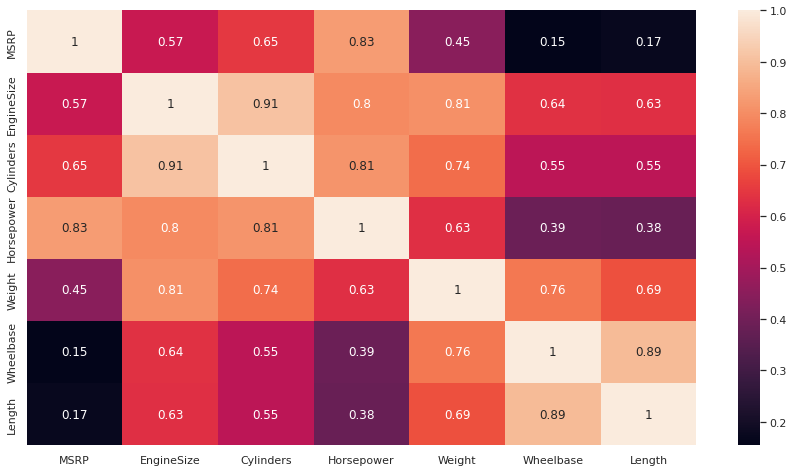

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cars_data.corr(), annot = True)

#### 2.Apply Quantile

In [26]:
Q1 = cars_data.quantile(0.25)
Q3 = cars_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSRP          19191.25
EngineSize        1.50
Cylinders         2.00
Horsepower       86.25
Weight          870.75
Wheelbase         9.00
Length           16.00
dtype: float64


In [27]:
cars_data = cars_data[~((cars_data < (Q1 - 1.5 * IQR)) |(cars_data > (Q3 + 1.5 * IQR))).any(axis=1)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


#### 3.BoxPlot and Histogram

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<Figure size 1080x576 with 0 Axes>

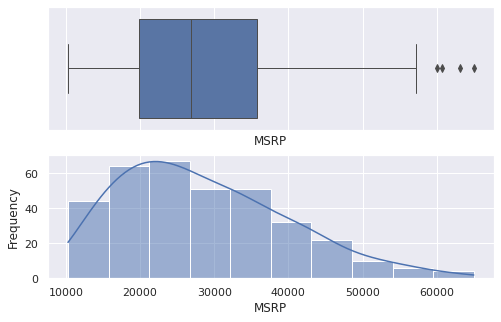

<Figure size 576x360 with 0 Axes>

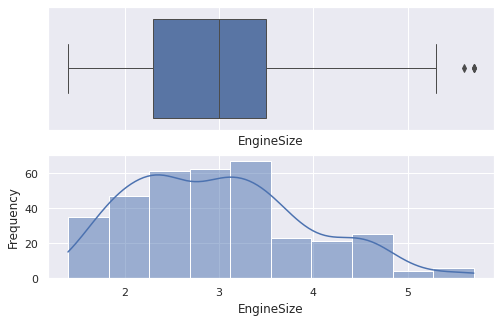

<Figure size 576x360 with 0 Axes>

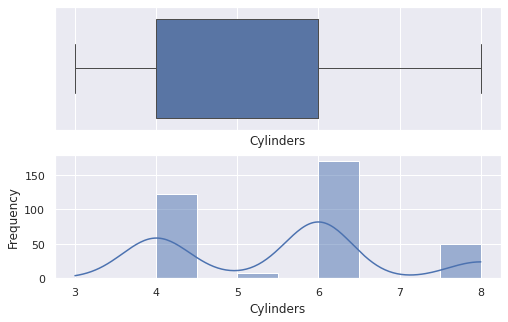

<Figure size 576x360 with 0 Axes>

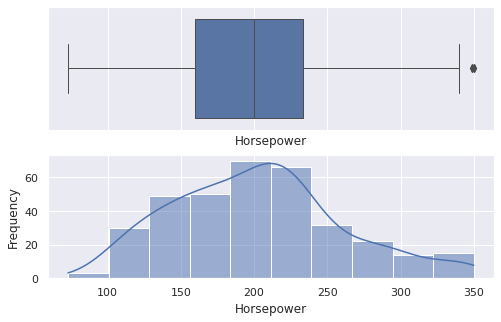

<Figure size 576x360 with 0 Axes>

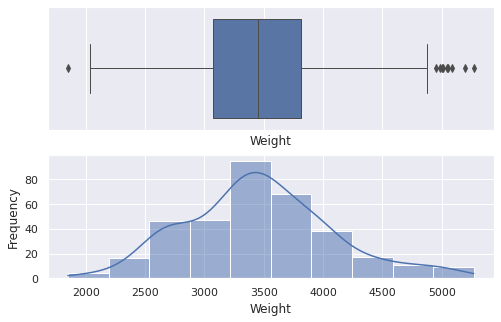

<Figure size 576x360 with 0 Axes>

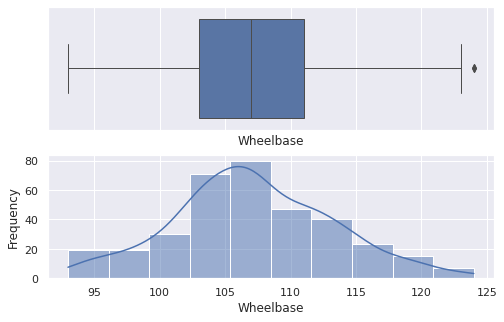

<Figure size 576x360 with 0 Axes>

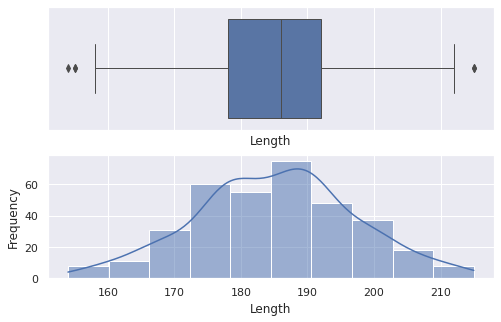

In [28]:
# ['MSRP','Invoice','EngineSize','Cylinders','Horsepower','Weight','Wheelbase','Length']:
# a for loop to automate our task--------------
for i in ['MSRP','EngineSize','Cylinders','Horsepower','Weight','Wheelbase','Length']:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(cars_data[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(cars_data[i], ax=ax_hist , bins = 10,kde=True)

<AxesSubplot:>

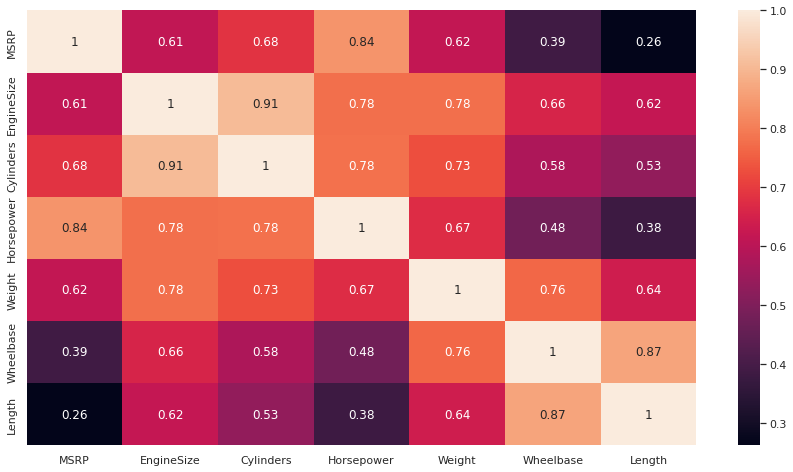

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cars_data.corr(), annot = True)

***Summary***
As you can see after applying the quartile and removing outlier point from each of the feature the linearity between target Variable (MSRP) and other featuer are improved

# 9.Categorical Features

#### 1.Creating Dummy of all Categorical Feature


In [30]:
df_dummies = pd.get_dummies(cars_data, columns = [ 'Make','Model', 'Type', 'Origin', 'DriveTrain'])
# We drop the 'Invoice column as it is not contributing to 'MSRP'
df_data = df_dummies
df_data.shape

(351, 404)

In [31]:
df_data

,MSRP,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length,Make_Acura,Make_Audi,Make_BMW,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,4451,106,189,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,2778,101,172,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,3230,105,183,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,3575,108,186,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,3880,115,197,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5.0,197,3450,105,186,0,0,0,...,1,0,0,0,0,1,0,0,1,0
424,42565,2.3,5.0,242,3450,105,186,0,0,0,...,1,0,0,0,0,1,0,0,1,0
425,45210,2.9,6.0,268,3653,110,190,0,0,0,...,1,0,0,0,0,1,0,0,1,0
426,26135,1.9,4.0,170,2822,101,180,0,0,0,...,0,0,0,1,0,1,0,0,1,0


# Apply Models

In [32]:
# Divide data into input and output
# Feeding input featues to X and output feature(MSRP) to y

X = df_data.drop(['MSRP'], axis = 1)
y = df_data['MSRP']

In [33]:
X = np.array(X)
y = np.array(y)

In [34]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
# train and evaluate multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [36]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
# model performance on testing data
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8815516488604896

A **Decision Trees** consists of decision nodes and leaves
- leaves are the final outcome or decision
- and nodes are where the data is split based on certain attribute
- Objective is to minimize the entropy which provides optimum split 

**Random Forest Regression**
- It's a type of ensemble algorithm
- It creates a set o decision trees from randomly selected subset of training set
- It then combines all the predicted values from different decision trees and find the average of them

**Random Forest: Why?**
- It overcomes the issues of single decision trees by reducing the effect of noice
- Overcomes the problem of overfitting by taking average of all the prdictions, cancelling out biases
- Runs effectively on large datasets and produces highly accurate predictions
- Random forest can maintain accuracy when large proportion of data is missing

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.8183415843557544

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
RandomForest_model = RandomForestRegressor(n_estimators = 5, max_depth = 5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [43]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8235184263576791

**XGBOOST**
- XGBoost or Extreme Gradient Boost can be used for regression or classification tasks
- It's a supervised learning algorithm and uses gradient boosted trees algorithm
- It works by combining an ensemble of predictions from several weak models
- It offers spped and enhanced memory utilization
- Idea behind is 'Discovering truth by building on previous discoveries

**Boosting**
- Boosting works by learning from previous mistakes to make better future predictions
- It is an ensemble machine learning technique that works by training weak models in a sequential fashion
- Each model is trying to learn from previous weak model and become better at making predictions

In [44]:
# Train and evaluate XGBoost Regressor
from xgboost import XGBRegressor

In [45]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
accuracy_XGB = XGB_model.score(X_test, y_test)
accuracy_XGB

0.8424951842081513

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

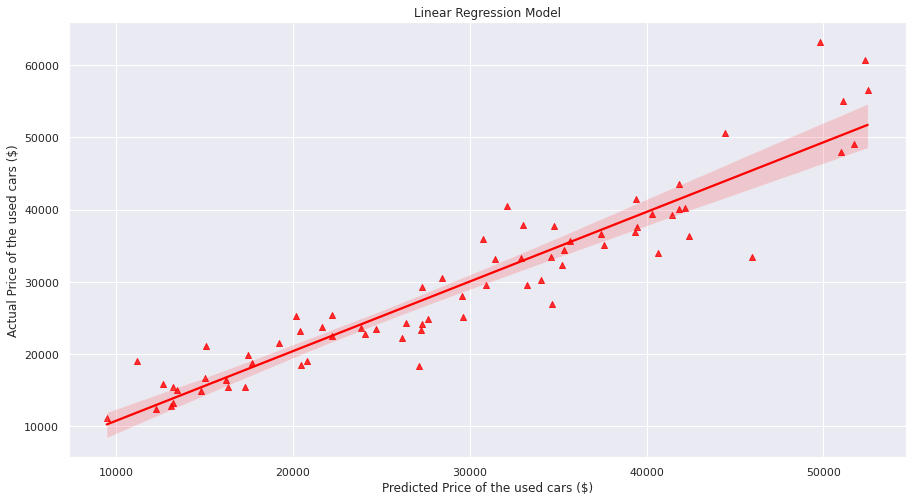

In [47]:
# Compare models and KPIs
Linear_predict = LinearRegression_model.predict(X_test)

fig = sns.regplot(x = Linear_predict, y = y_test, color = 'red', marker = '^')
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [48]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, Linear_predict)), ".3f"))
MSE= mean_squared_error(y_test, Linear_predict)
MAE= mean_absolute_error(y_test, Linear_predict)
r2= r2_score(y_test, Linear_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 4107.795 
MSE = 16873978.78606992 
MAE = 3069.0413991123187 
R2 = 0.8815516488604896


[Text(0.5, 1.0, 'Random Forest Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

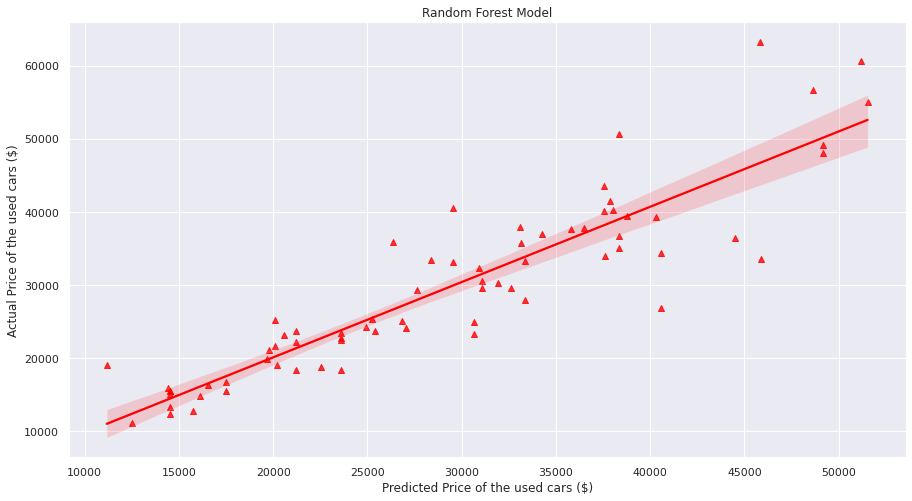

In [49]:
Random_predict = RandomForest_model.predict(X_test)

fig = sns.regplot(x = Random_predict, y = y_test, color = 'red', marker = '^')
fig.set(title = "Random Forest Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [50]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, Random_predict)), ".3f"))
MSE= mean_squared_error(y_test, Random_predict)
MAE= mean_absolute_error(y_test, Random_predict)
r2= r2_score(y_test, Random_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 5014.111 
MSE = 25141306.747827042 
MAE = 3489.8089234069857 
R2 = 0.8235184263576791


[Text(0.5, 1.0, 'XGB Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

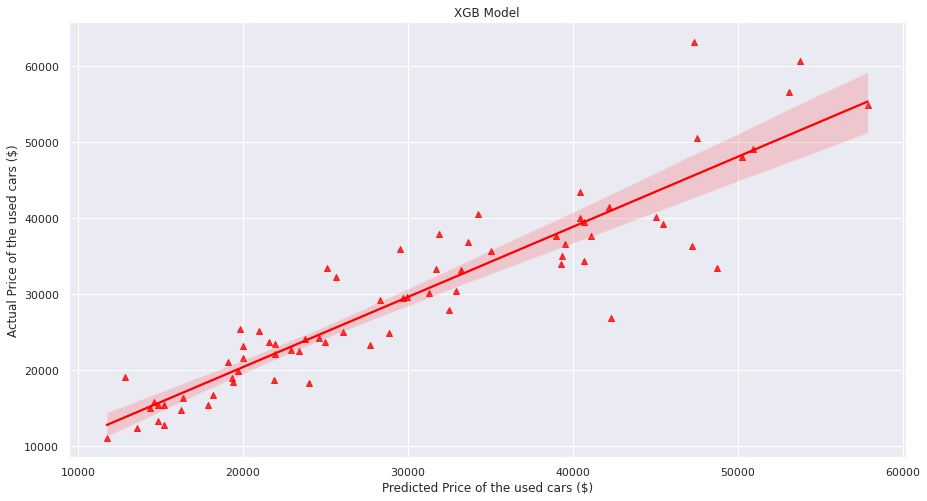

In [51]:
XGB_predict = XGB_model.predict(X_test)

fig = sns.regplot(x = XGB_predict, y = y_test, color = 'red', marker = '^')
fig.set(title = "XGB Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [52]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, XGB_predict)), ".3f"))
MSE= mean_squared_error(y_test, XGB_predict)
MAE= mean_absolute_error(y_test, XGB_predict)
r2= r2_score(y_test, XGB_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 4736.867 
MSE = 22437905.59182362 
MAE = 3232.4701391945423 
R2 = 0.8424951842081513
